Accuracy: 0.673
              precision    recall  f1-score   support

         Cat       0.68      0.67      0.67      1012
         Dog       0.67      0.68      0.67       988

    accuracy                           0.67      2000
   macro avg       0.67      0.67      0.67      2000
weighted avg       0.67      0.67      0.67      2000



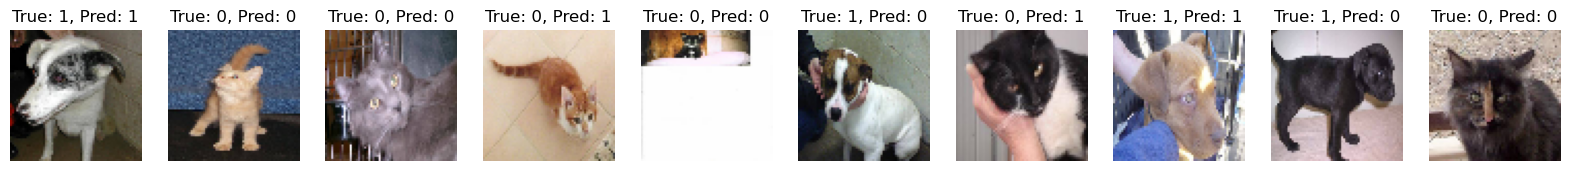

Silhouette Score: 0.010336988058923448
Davies-Bouldin Index: 10.523610746813588


In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import silhouette_score, davies_bouldin_score
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

# Function to load images from a folder
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (64, 64))  # Resize to 64x64
            images.append(img.flatten())  # Flatten the image
            labels.append(label)
    return images, labels

# Replace these paths with the actual paths to your folders
cats_folder = 'E:/PRODIGY INTERN PROJECTS/cat'
dogs_folder = 'E:/PRODIGY INTERN PROJECTS/dog'

# Load the images
cats_images, cats_labels = load_images_from_folder(cats_folder, 0)  # Label cats as 0
dogs_images, dogs_labels = load_images_from_folder(dogs_folder, 1)  # Label dogs as 1

# Combine the data and labels
X = np.array(cats_images + dogs_images)
y = np.array(cats_labels + dogs_labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model
svm = SVC(kernel='rbf', gamma='scale', random_state=42)
svm.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = svm.predict(X_test_scaled)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred, target_names=['Cat', 'Dog']))

# Visualize some of the predictions
def plot_sample_images(images, labels, preds, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        plt.subplot(1, n, i+1)
        img = images[i].reshape(64, 64, 3)  # Reshape for RGB image
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
        plt.title(f'True: {labels[i]}, Pred: {preds[i]}')
        plt.axis('off')
    plt.show()

plot_sample_images(X_test, y_test, y_pred)

# Calculate Silhouette Score and Davies-Bouldin Index
silhouette_avg = silhouette_score(X_test_scaled, y_pred)
davies_bouldin_avg = davies_bouldin_score(X_test_scaled, y_pred)

print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {davies_bouldin_avg}')


# To Predict a Single Picture

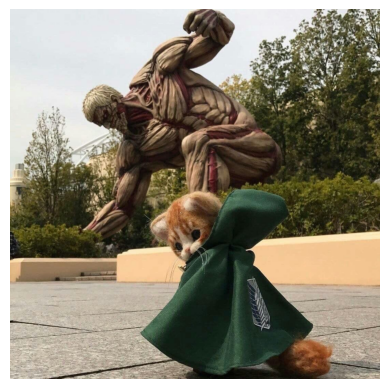

The image is a Cat.


In [19]:
import joblib
import cv2
import matplotlib.pyplot as plt

def predict_image(image_path, model_path='svm_model.joblib', scaler_path='scaler.joblib'):
    # Load the model and the scaler
    model = joblib.load(model_path)
    scaler = joblib.load(scaler_path)
    
    # Read and preprocess the image
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img_resized = cv2.resize(img_rgb, (64, 64))
    img_flattened = img_resized.flatten()
    img_scaled = scaler.transform([img_flattened])
    
    # Predict the class
    prediction = model.predict(img_scaled)
    
    # Display the image in the notebook
    plt.imshow(img_rgb)
    plt.axis('off')  # Hide axes
    plt.show()
    
    return 'Cat' if prediction[0] == 0 else 'Dog'

# Example usage
image_path = 'C:/Users/NaveenP/Pictures/cat7.jpg'  # Replace with the path to your test image
result = predict_image(image_path)
print(f'The image is a {result}.')
